In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import descartes
from tqdm import tqdm
import geopandas as gpd
import pickle
import requests
import os
from pyproj import Transformer
from shapely.geometry import Point, Polygon

%matplotlib inline

In [3]:
try:
    with open('pickle/London_road_fig.pkl', 'rb') as f:
        loaded_fig = pickle.load(f)
        ax = loaded_fig.axes[0]
        print("Loaded Pickle")
    # loaded_fig.show()
except EOFError:
    print("Error: The file is empty or corrupted.")
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: [Errno 2] No such file or directory: 'pickle/London_road_fig.pkl'


In [47]:

file_url = 'http://www.tfl.gov.uk/tfl/syndication/feeds/cycle-hire/livecyclehireupdates.xml'
response = requests.get(file_url)

# Check if the request was successful
if response.status_code == 200:
    # Save the CSV file
    file_path = os.path.join('data/', 'live_dock_info.xml')
    with open(file_path, 'wb') as file:
        file.write(response.content)
    print(f"Downloaded {file_url}")
else:
    print(f"Failed to download {file_url}, Status code: {response.status_code}")

Downloaded http://www.tfl.gov.uk/tfl/syndication/feeds/cycle-hire/livecyclehireupdates.xml


In [48]:
# Function to map decimal values to colors between red and green
def decimal_to_colour(value):
    norm = mcolors.Normalize(vmin=0, vmax=1)
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
    return cmap(norm(value))

In [49]:
live = pd.read_xml(file_path, parser='etree')

live['fractionFull'] = live['nbBikes']/live['nbDocks']

# Define the projection transformer
transformer = Transformer.from_crs("epsg:4326", "epsg:27700", always_xy=True)

# Transform the coordinates
live['Easting'], live['Northing'] = transformer.transform(live['long'].values, live['lat'].values)
live['geometry'] = [Point(xy) for xy in zip(live['Easting'], live['Northing'])]

live['colour'] = live.apply(lambda row: decimal_to_colour(row['fractionFull']), axis=1)
live.head()




/home/oren/miniconda3/envs/ML/lib/python3.10/site-packages/matplotlib/colors.py:737: RuntimeWarning: invalid value encountered in less
  mask_under = xa < 0
/home/oren/miniconda3/envs/ML/lib/python3.10/site-packages/matplotlib/colors.py:738: RuntimeWarning: invalid value encountered in greater_equal
  mask_over = xa >= self.N


id                                  name  terminalName        lat  \
0   1            River Street , Clerkenwell          1023  51.529163   
1   2        Phillimore Gardens, Kensington          1018  51.499607   
2   3  Christopher Street, Liverpool Street          1012  51.521284   
3   4       St. Chad's Street, King's Cross          1013  51.530059   
4   5         Sedding Street, Sloane Square          3420  51.493130   

       long  installed  locked   installDate  removalDate  temporary  nbBikes  \
0 -0.109971       True   False  1.278947e+12          NaN      False       11   
1 -0.197574       True   False  1.278586e+12          NaN      False       14   
2 -0.084606       True   False  1.278240e+12          NaN      False        6   
3 -0.120974       True   False  1.278241e+12          NaN      False       22   
4 -0.156876       True   False  1.278241e+12          NaN      False       11   

   nbStandardBikes  nbEBikes  nbEmptyDocks  nbDocks  fractionFull  \
0               10         1             8       19      0.578947   
1               14         0            21       37      0.378378   
2                6         0            25       32      0.187500   
3               22         0             1       23      0.956522   
4               11         0            15       27      0.407407   

         Easting       Northing                                     geometry  \
0  531201.732340  182831.801961  POINT (531201.7323399857 182831.8019612367)   
1  525206.415593  179391.754240  POINT (525206.4155931902 179391.7542402102)   
2  532984.001881  182001.341198  POINT (532984.0018806285 182001.3411977346)   
3  530435.982367  182911.772902  POINT (530435.9823671918 182911.7729016338)   
4  528049.277060  178741.842635  POINT (528049.2770600404 178741.8426345289)   

                                              colour  
0   (0.83921568627451, 0.9199231064975011, 0.0, 1.0)  
1                (1.0, 0.7529411764705882, 0.0, 1.0)  
2                (1.0, 0.3764705882352941, 0.0, 1.0)  
3  (0.08627450980392182, 0.5449288735101885, 0.0,...  
4                (1.0, 0.8156862745098039, 0.0, 1.0)

Loaded Pickle


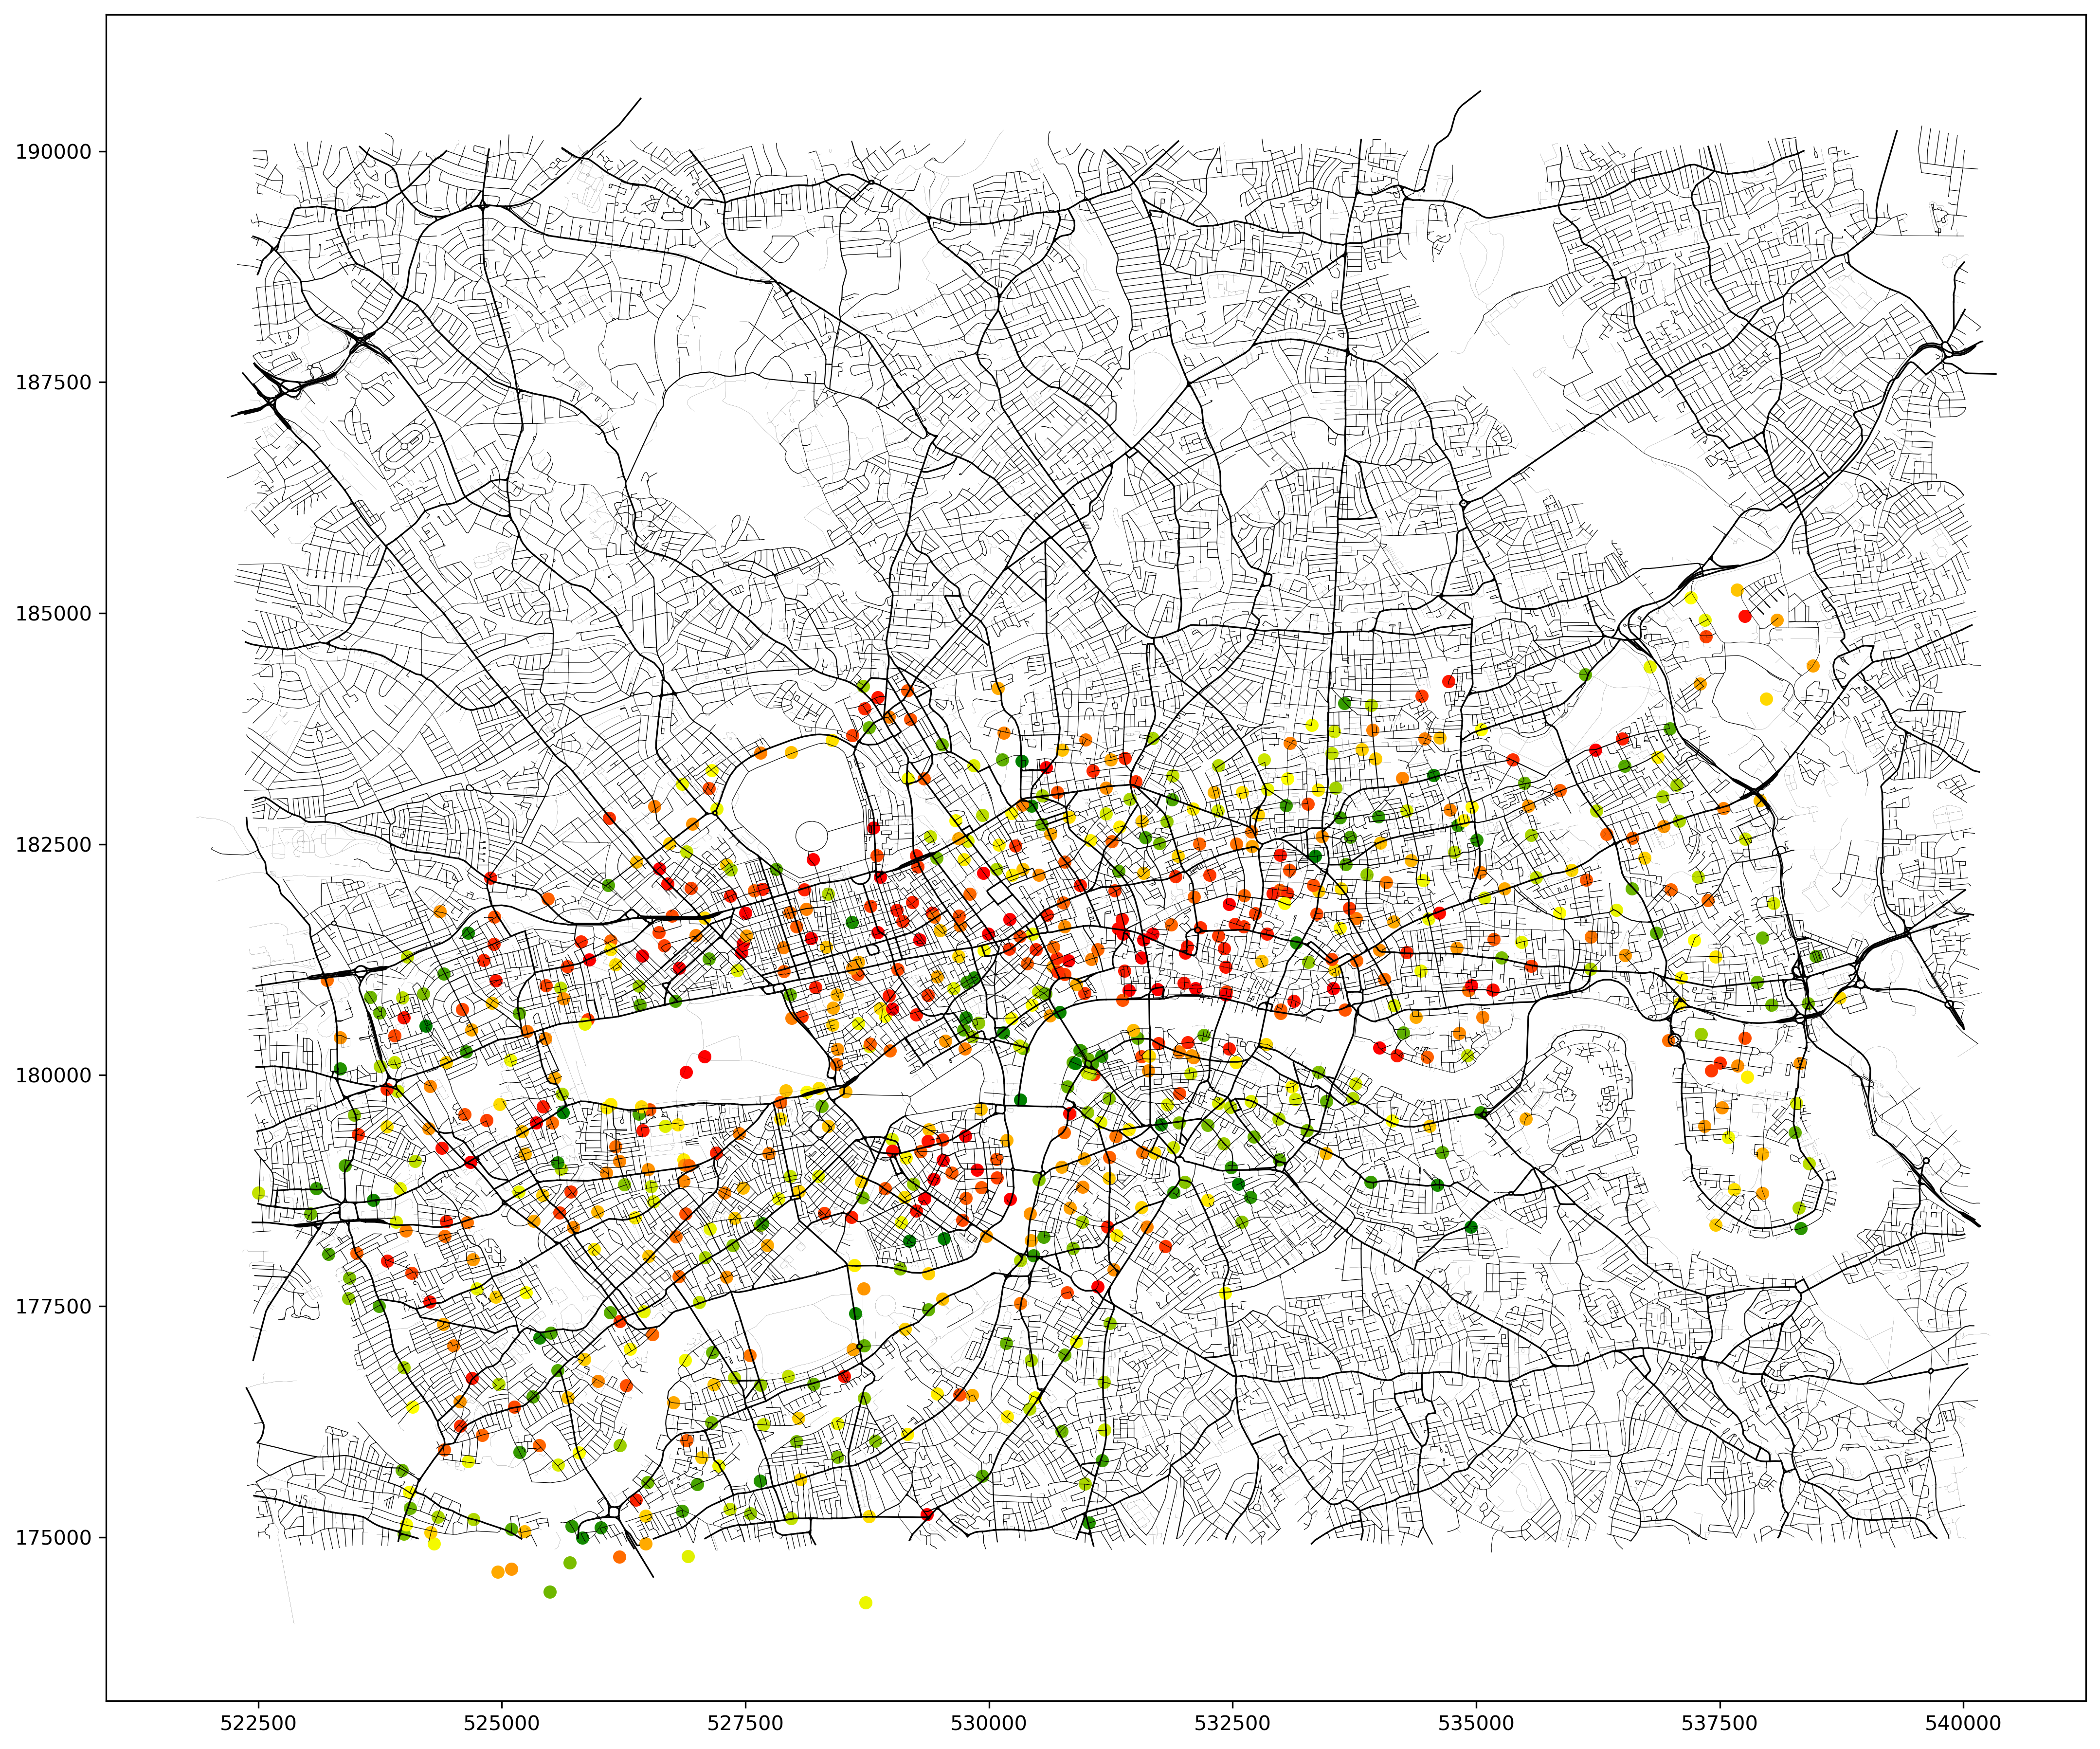

In [50]:
try:
    with open('pickle/London_road_fig.pkl', 'rb') as f:
        loaded_fig = pickle.load(f)
        ax = loaded_fig.axes[0]
        print("Loaded Pickle")
    # loaded_fig.show()
except EOFError:
    print("Error: The file is empty or corrupted.")
except Exception as e:
    print(f"An error occurred: {e}")

for idx, row in live.iterrows():
    
    ax.scatter(row['Easting'], row['Northing'], color=row['colour'], lw=0.5)

plt.show()